# Algo-trading: Sentimental Analysis Signal
> Author: **Felipe Dominguez**
>
> Date: **06/17/2021**
>
> **Team 2:**
>Nicola Bini
<br>
>Felipe Dominguez
<br>
>Tri Dung Dinh
<br>
>Manuel Echazarra
<br>
## Summary
This code used the sentimental indicator created in (SentimentalIndicator (Pos-Neg)) to create a signal to decide when go long or short in each stock. At the end a backtest is performed to see the statistics of this strategy. 

In [2]:
import bt 
import talib as ta
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    # Visual graphics package
import datetime
# Configurations
%matplotlib inline 
plt.rcParams["figure.figsize"] = (15, 7) # Set figure size for notebook

In [11]:

tickers = ['ocgn', 'hgen', 'vuzi', 'dnn']
signal = pd.DataFrame()
for ticker in tickers:
    
    signal_ticker = pd.read_csv('.\signal_'+ ticker+ '_2.csv')
    signal_ticker2 = signal_ticker[['Date','signal']]
    signal_ticker2['Date']=signal_ticker2['Date'].astype(np.datetime64)
    signal_ticker2.rename(columns = {'Date':'date'}, inplace = True)
    
    signal_ticker2=signal_ticker2.set_index('date')

    signal_ticker2=signal_ticker2.rename(columns = {'signal': ticker})

    signal_ticker2[(signal_ticker2[ticker].isnull()) ] = 0
    #Assign weights for each stock and if the strategy should be going long (+) or short (-)
    for col in signal_ticker2:
        for i, row in signal_ticker2.iterrows():
            if signal_ticker2.loc[i, col] > 0:
                signal_ticker2.loc[i, col] =0.25
            elif signal_ticker2.loc[i, col] <= 0:
                signal_ticker2.loc[i, col] = -0.25
            else:
                signal_ticker2.loc[i, col] = "ERROR!!"

#     signal_ticker2.to_csv('.\sentimental_analysis_signal.csv')
    signal = pd.concat([signal, signal_ticker2], axis=1)

signal = signal.dropna()
signal.to_csv('.\sentimental_analysis_signal.csv')

<ipython-input-11-9533f02c707c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_ticker2['Date']=signal_ticker2['Date'].astype(np.datetime64)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
start_date = "2019-12-09"
end_date   = "2021-06-07"

bt_ticker = bt.get(tickers, start=start_date, end=end_date)




In [9]:
bt_ticker

,ocgn,hgen,vuzi,dnn
Date,,,,
2019-12-09,0.386,2.250000,2.420000,0.41
2019-12-10,0.393,1.950000,2.390000,0.40
2019-12-11,0.375,1.900000,2.300000,0.40
2019-12-12,0.350,2.000000,2.160000,0.40
2019-12-13,0.340,1.800000,2.170000,0.41
...,...,...,...,...
2021-06-01,8.570,18.629999,18.799999,1.32
2021-06-02,9.455,19.360001,19.990000,1.26
2021-06-03,8.890,18.240000,18.870001,1.28


C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Stat                 sentan_strategy
-------------------  -----------------
Start                2019-12-08
End                  2021-06-07
Risk-free rate       0.00%

Total Return         140.00%
Daily Sharpe         1.04
Daily Sortino        2.12
CAGR                 79.42%
Max Drawdown         -52.99%
Calmar Ratio         1.50

MTD                  7.81%
3m                   -16.23%
6m                   51.27%
YTD                  9.00%
1Y                   72.86%
3Y (ann.)            79.42%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  79.42%

Daily Sharpe         1.04
Daily Sortino        2.12
Daily Mean (ann.)    114.79%
Daily Vol (ann.)     110.20%
Daily Skew           2.58
Daily Kurt           23.19
Best Day             54.41%
Worst Day            -37.43%

Monthly Sharpe       1.14
Monthly Sortino      4.06
Monthly Mean (ann.)  124.00%
Monthly Vol (ann.)   108.32%
Monthly Skew         0.82
Monthly Kurt         -0.78
Best Month           68.46%
Worst Month  

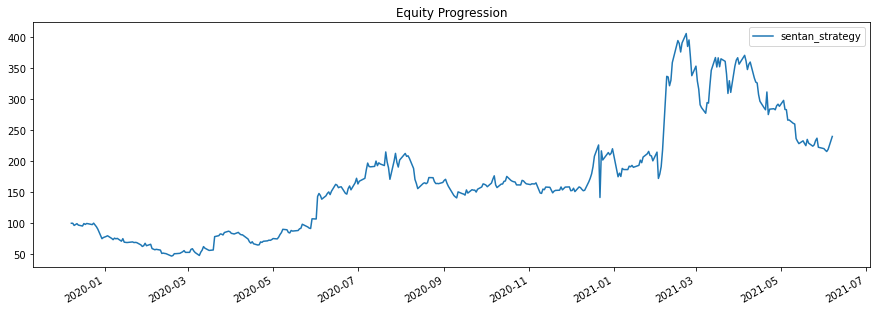

In [10]:

sen_strategy = bt.Strategy('sentan_strategy', [bt.algos.WeighTarget(signal),
                                          bt.algos.Rebalance()])


benchmark   = bt.Strategy("benchmark_buy_hold",[bt.algos.RunWeekly(),
                                                bt.algos.SelectAll(),
                                                bt.algos.WeighEqually(),
                                                bt.algos.Rebalance()])


backtest = bt.Backtest(sen_strategy, bt_ticker)
results = bt.run(backtest)
results.plot()
results.display()